# **Import Libraries**

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVC

from sklearn import metrics
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/data (2).csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **Analyze & EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data = data.dropna(axis='columns')

In [ ]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
diagnosis_unique = data.diagnosis.unique()

In [ ]:
diagnosis_unique

array(['M', 'B'], dtype=object)

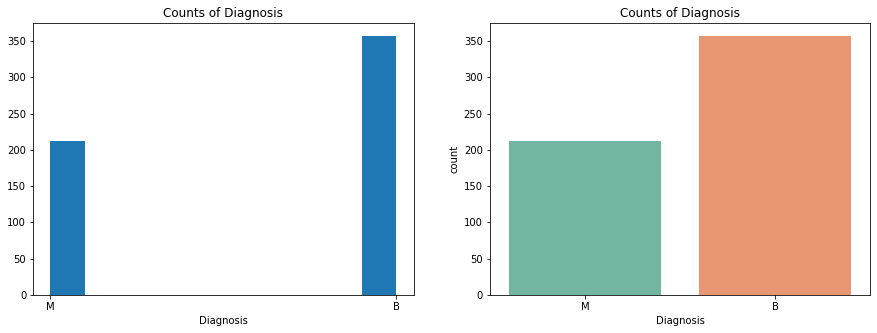

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(data['diagnosis'])
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")

plt.subplot(1, 2, 2)
sns.countplot(x='diagnosis', data=data, palette='Set2')
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")

plt.show()

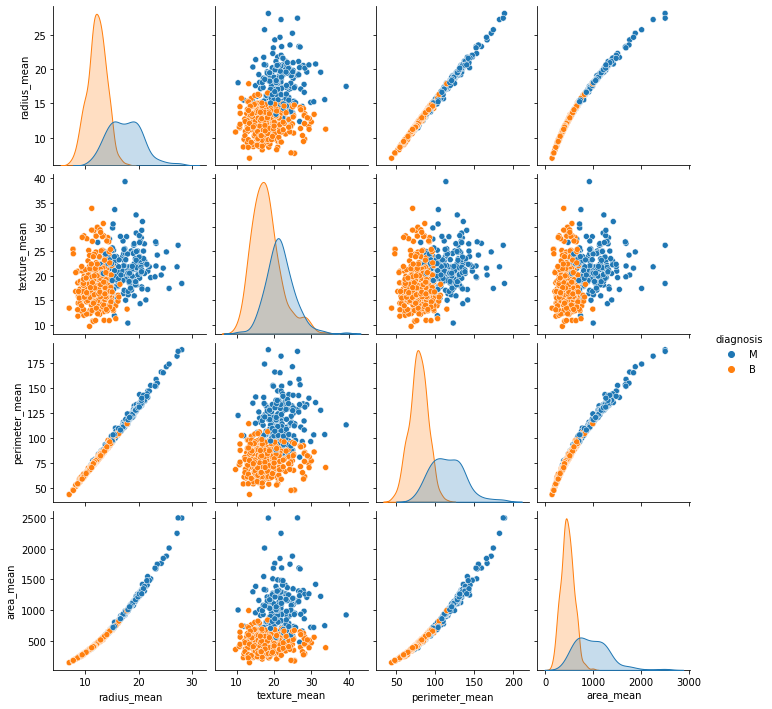

In [ ]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

Convert Cateogircal Feature to Numeric using LabelEncoder

In [ ]:
labelencoder_Y = LabelEncoder()
data.diagnosis = labelencoder_Y.fit_transform(data.diagnosis)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Print the counts of diagnosis
diagnosis_counts = data['diagnosis'].value_counts()
print(diagnosis_counts)

# Print the total number of diagnosis counts
total_counts = diagnosis_counts.sum()
print("\nTotal counts:", total_counts)

0    357
1    212
Name: diagnosis, dtype: int64

Total counts: 569


In [ ]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
data[cols].corr()

11


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


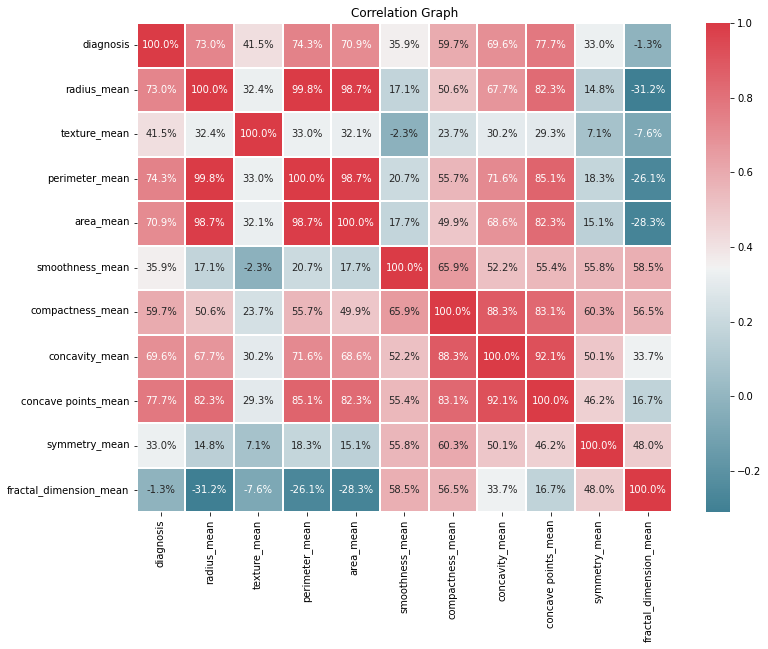

In [ ]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

# **Feature Selection & Scaling**

In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']

targeted_feature = 'diagnosis'

len(prediction_feature)

6

In [ ]:
X = data[prediction_feature]
X

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
0,17.99,122.80,1001.0,0.2419,0.27760,0.14710
1,20.57,132.90,1326.0,0.1812,0.07864,0.07017
2,19.69,130.00,1203.0,0.2069,0.15990,0.12790
3,11.42,77.58,386.1,0.2597,0.28390,0.10520
4,20.29,135.10,1297.0,0.1809,0.13280,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.1726,0.11590,0.13890
565,20.13,131.20,1261.0,0.1752,0.10340,0.09791
566,16.60,108.30,858.1,0.1590,0.10230,0.05302
567,20.60,140.10,1265.0,0.2397,0.27700,0.15200


In [ ]:
y = data.diagnosis
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

print(X_train)

     radius_mean  perimeter_mean  area_mean  symmetry_mean  compactness_mean  \
274        17.93          115.20      998.9         0.1538           0.07027   
189        12.30           78.83      463.7         0.1667           0.07253   
158        12.06           76.84      448.6         0.1590           0.05241   
257        15.32          103.20      713.3         0.2398           0.22840   
486        14.64           94.21      666.0         0.1409           0.06698   
..           ...             ...        ...            ...               ...   
85         18.46          121.10     1075.0         0.2132           0.10530   
199        14.45           94.49      642.7         0.1950           0.12060   
156        17.68          117.40      963.7         0.1971           0.16650   
384        13.28           85.79      541.8         0.1617           0.08575   
456        11.63           74.87      415.1         0.1799           0.08574   

     concave points_mean  
274         

**Standard Scaler**

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# **Applying Models**

In [ ]:
from sklearn.metrics import accuracy_score

def model_building(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    return train_score, test_accuracy, test_predictions


In [ ]:
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
}

# print(models_list)

In [ ]:
print(list(models_list.keys()))
print(list(models_list.values()))

# print(zip(list(models_list.keys()), list(models_list.values())))

['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC']
[LogisticRegression(), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC()]


Model Implementing

Now, Train the model one by one and show the classification report of perticular models wise.

In [ ]:
# Let's Define the function for confision metric Graphs

def cm_metrix_graph(cm):
    
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()

In [ ]:
df_predictions = []
confusion_matrices = []
df_prediction_cols = ['model_name', 'score', 'accuracy_score', 'accuracy_percentage']

for name, model in models_list.items():
    score, accuracy, predictions = model_building(model, X_train, X_test, y_train, y_test)
    print(f"\n\nClassification Report of '{name}'\n")
    print(classification_report(y_test, predictions))
    
    df_predictions.append([name, score, accuracy, f"{accuracy:.2%}"])
    confusion_matrices.append(confusion_matrix(y_test, predictions))
    
df_pred = pd.DataFrame(df_predictions, columns=df_prediction_cols)



Classification Report of 'LogisticRegression'

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188



Classification Report of 'RandomForestClassifier'

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.93      0.88      0.90        73

    accuracy                           0.93       188
   macro avg       0.93      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188



Classification Report of 'DecisionTreeClassifier'

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy               

In [ ]:
print(len(confusion_matrices))

4


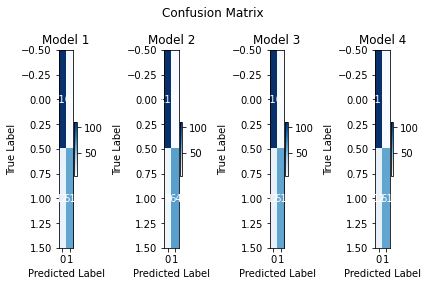

In [ ]:
plt.suptitle("Confusion Matrix", fontsize=12)

for index, cm in enumerate(confusion_matrices):
    plt.subplot(1, len(confusion_matrices), index+1)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Model {index+1}")
    plt.imshow(cm, cmap='Blues', aspect='auto')
    plt.colorbar()
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i,j], ha="center", va="center", color="white")
plt.tight_layout(pad=1.0)
plt.show()

In [ ]:
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.916010,0.909574,90.96%
1,RandomForestClassifier,0.992126,0.925532,92.55%
2,DecisionTreeClassifier,1.000000,0.909574,90.96%
3,SVC,0.923885,0.914894,91.49%


**K-Fold**

In [ ]:
len(data)

569

In [ ]:
cv_score = cross_validate(LogisticRegression(), X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

pd.DataFrame(cv_score).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,3.0,0.017029,0.011656,0.009690,0.010309,0.010928,0.020698,0.030468
score_time,3.0,0.002402,0.000145,0.002274,0.002323,0.002373,0.002466,0.002560
test_r2,3.0,0.534312,0.186125,0.325364,0.460291,0.595218,0.638786,0.682353
train_r2,3.0,0.545196,0.051555,0.514363,0.515437,0.516511,0.560613,0.604714
test_neg_mean_squared_error,3.0,-0.108902,0.043669,-0.157895,-0.126316,-0.094737,-0.084405,-0.074074
train_neg_mean_squared_error,3.0,-0.106321,0.012102,-0.113456,-0.113307,-0.113158,-0.102753,-0.092348


In [ ]:
def cross_val_scorring(model):
    
#     (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    model.fit(data[prediction_feature], data[targeted_feature])
    
    # score = model.score(X_train, y_train)    
    
    predictions = model.predict(data[prediction_feature])    
    accuracy = accuracy_score(predictions, data[targeted_feature])
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")
    
    
    # Initialize K folds.
    kFold = KFold(n_splits=5) # define 5 diffrent data folds
    
    err = []
    
    for train_index, test_index in kFold.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)

        # Data Spliting via fold indexes
        X_train = data[prediction_feature].iloc[train_index, :] # train_index = rows and all columns for Prediction_features
        y_train = data[targeted_feature].iloc[train_index] # all targeted features trains
        
        X_test = data[prediction_feature].iloc[test_index, :] # testing all rows and cols
        y_test = data[targeted_feature].iloc[test_index] # all targeted tests
        
        # Again Model Fitting
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))
        
        print("Score:", round(np.mean(err),  2) )

In [ ]:
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    cross_val_scorring(model)


Full-Data Accuracy: 0.9
Cross Validation Score of'LogisticRegression '

Score: 0.91
Score: 0.91
Score: 0.9
Score: 0.9
Score: 0.9

Full-Data Accuracy: 1.0
Cross Validation Score of'RandomForestClassifier '

Score: 0.99
Score: 0.99
Score: 0.99
Score: 1.0
Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 0.89
Cross Validation Score of'SVC '

Score: 0.9
Score: 0.89
Score: 0.88
Score: 0.88
Score: 0.88


# **Tuning**

In [ ]:
from  sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Decison Tree**

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Model 1 - Decision Tree
model1 = DecisionTreeClassifier()

# Tunning Params
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }

# Implement GridSearchCV
gsc1 = GridSearchCV(model1, param_grid, cv=10) # For 10 Cross-Validation

gsc1.fit(X_train, y_train) # Model Fitting

# Get the predictions
y_pred = gsc1.predict(X_test)

best_score3 = gsc1.best_score_
# Get the evaluation metrics
acc = gsc1.score(X_test, y_test)
f1 = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the results
print("Model 1 - Decision Tree")
print("Accuracy: {:.2f}%".format(acc * 100))
print("F1 Score:\n", f1)
print("AUC: {:.2f}%".format(auc * 100))

Model 1 - Decision Tree
Accuracy: 88.30%
F1 Score:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       115
           1       0.93      0.75      0.83        73

    accuracy                           0.88       188
   macro avg       0.90      0.86      0.87       188
weighted avg       0.89      0.88      0.88       188

AUC: 85.93%


**KNN**

In [ ]:
# Select the model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}

# Perform grid search with cross-validation
from sklearn.model_selection import GridSearchCV
gsc2 = GridSearchCV(model, param_grid, cv=10)
gsc2.fit(X_train, y_train)

best_score2 = gsc2.best_score_

# Get the evaluation metrics
acc = gsc2.score(X_test, y_test)
f1 = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the results
print("Model 1 - Decision Tree")
print("Accuracy: {:.2f}%".format(acc * 100))
print("F1 Score:\n", f1)
print("AUC: {:.2f}%".format(auc * 100))

Model 1 - Decision Tree
Accuracy: 90.43%
F1 Score:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       115
           1       0.93      0.75      0.83        73

    accuracy                           0.88       188
   macro avg       0.90      0.86      0.87       188
weighted avg       0.89      0.88      0.88       188

AUC: 85.93%


**Random Forest**

In [ ]:
# Pick the model
model = RandomForestClassifier()


# Tunning Params
random_grid = {'bootstrap': [True, False],
 'max_depth': [40, 50, None], # 10, 20, 30, 60, 70, 100,
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2], # , 4
 'min_samples_split': [2, 5], # , 10
 'n_estimators': [200, 400]} # , 600, 800, 1000, 1200, 1400, 1600, 1800, 2000

# Implement GridSearchCV
gsc3 = GridSearchCV(model, random_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc3.fit(X_train, y_train)

best_score1 = gsc3.best_score_

# Get the evaluation metrics
acc = gsc3.score(X_test, y_test)
f1 = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the results
print("Model 1 - Decision Tree")
print("Accuracy: {:.2f}%".format(acc * 100))
print("F1 Score:\n", f1)
print("AUC: {:.2f}%".format(auc * 100))

Model 1 - Decision Tree
Accuracy: 90.96%
F1 Score:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       115
           1       0.90      0.78      0.84        73

    accuracy                           0.88       188
   macro avg       0.89      0.86      0.87       188
weighted avg       0.88      0.88      0.88       188

AUC: 86.43%


**ADAboost**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()

random_grid = {
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

gsc4 = GridSearchCV(model, random_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc4.fit(X_train, y_train)

best_score4 = gsc4.best_score_

# Get the evaluation metrics
acc = gsc4.score(X_test, y_test)
f1 = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the results
print("Model 1 - Decision Tree")
print("Accuracy: {:.2f}%".format(acc * 100))
print("F1 Score:\n", f1)
print("AUC: {:.2f}%".format(auc * 100))

Model 1 - Decision Tree
Accuracy: 92.55%
F1 Score:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       115
           1       0.93      0.75      0.83        73

    accuracy                           0.88       188
   macro avg       0.90      0.86      0.87       188
weighted avg       0.89      0.88      0.88       188

AUC: 85.93%


In [ ]:
import pandas as pd

results = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'KNN', 'AdaBoost'],
                        'Accuracy': [best_score3, best_score1, best_score2, best_score4]
                         })

# Set the index to start from 1 instead of 0
results.index += 1

print(results)


           Model  Accuracy
1  Decision Tree  0.926383
2  Random Forest  0.913225
3            KNN  0.915924
4       AdaBoost  0.918556
